# Ensemble Methods
The idea behind ensemble methods is combining multiple ML models, rather than just using one, to improve the accuracy of the results. 

![ensemble methods](https://prismic-io.s3.amazonaws.com/encord/1e02b8c6-cf23-46af-a6a9-f42678a00289_What+is+ensemble+learning%3F.png)

## Bootstrapping
Bootstrapping is a resampling technique that repeatedly draws samples from the dataset (with replacement). It's also used in statistics! We randomly sample n datapoints from the dataset, and we estimate the statistics of interest from each of these samples. This process is then iterated over many times. The collection of computed statistics is aggregated to estimate the overall sampling distribution of the statistic. 

## Random Forests
Random forests are a popular ML ensemble method used for both regression and classification tasks. Random forests are built up of multiple decision trees, in which a random subset of training data is selected and a decision tree is trained on it. At each split in the decision tree, random foresets will randomly consider a subset of features to analuze. isThis step is repeated many times unitl you get a forest of decision trees (haha). As with bootstrapping, conclusions about the data are aggreggated from each individual tree and combined using a majority vote to produce a final prediction.

Random forests are less prone to overfitting, even with complex datasets, due to its randomness. It tends to provide a good generalization of performance across different types of datasets. They can handle large ranges of data types and good with noise. Still, random forests can be computationally expensive and require a significant amount of memory, as its utilizing multiple decision trees. 

## Boosting
Boosting is another popular ensemble method, but unlike random forests, it builds each of its multiple models sequentially. The idea behind boosting is that for each new iteration, it will slightly correct from the error of  the last. Each new model focuses on the misclassified samples of the previous model.

AdaBoost is one popular boosting algorithm. This algorithm adjusts the weights of each training instance. It assigns higher weights to misclassified datapoints, which forces weak learners to focus more on these samples. This algorithm tends to train faster and is good at handling noisy data and smaller datasets.

Conversely, Gradient Boosting Machines also trains weak learners, but it fits each new model iteration to the residual errors of the previous iteration. GBM generally achieves higher predictive performance than AdaBoost and can train on more complex datasets, but it requires more computational effort.

Both versions of boosting rely often on decision trees and have learning rates, although the applications can be a bit different.

# Application: Random Forests & Boosting

We return to the diabetes dataset to do some further analysis! Let's first read and print out information on the dataset to get a reminder about what variables this dataset has.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Set theme for plotting
sns.set_theme()

# Import the data
df = pd.read_csv(r"C:\Users\faith\inde 577\INDE577\577repo\Supervised Learning\Datasets\diabetes_012_health_indicators_BRFSS2015.csv")

df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


We will then splot the data into training and testing data. We will consider every variable that the dataset has.

In [3]:
#X= df.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].values
y= df.iloc[:,0].values


X = df.drop('Diabetes_012', axis=1)
#y = df['Diabetes_012']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)

## Application on Random Forests

Here are the steps we will follow:
1) Build a random forest model using the scikit-learn module, RandomForestClassifier. We will set n estimators/number of decision trees to 50
2) Fit the model, which will train the decision tree on a subset of data.
3) Perform cross validation to see how well our model generalizes to new data.

In [4]:
#Building the Random Forest model
rf = RandomForestClassifier(n_estimators= 50, random_state=42)
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

k = 5
cv_results = cross_val_score(rf, X_train, y_train, cv=k, scoring='r2')
print(cv_results)


[-0.17479777 -0.1752006  -0.19063329 -0.17489195 -0.17836317]


Next, we are going to evaluate the performance of random forests with the code below:

Training errors- MAE:0.011471144749290445, MSE:0.021746557342583833, R2:0.9555507829377231
Testing errors- MAE:0.29799353516240934, MSE:0.5767502365184485, R2:-0.18993761354790517


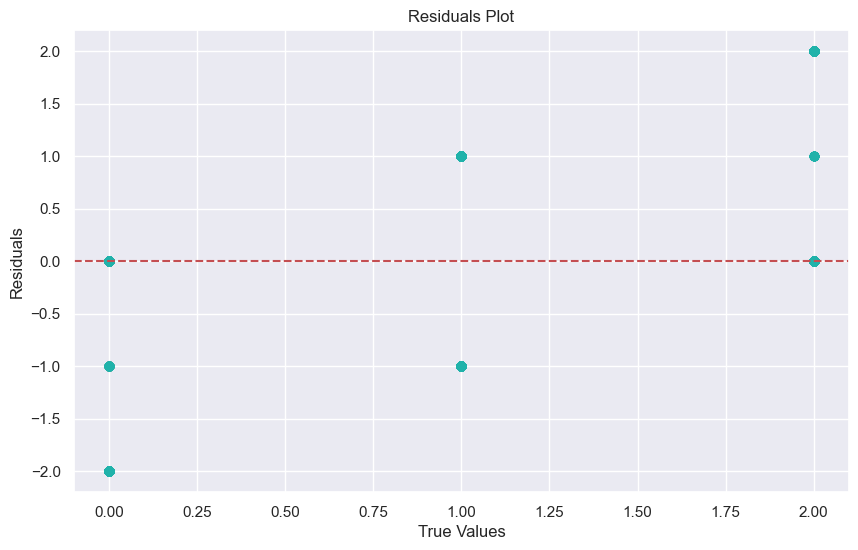

In [5]:
#training error:
mae1 = mean_absolute_error(y_train, y_pred_train)
mse1 = mean_squared_error(y_train, y_pred_train)
r21 = r2_score(y_train, y_pred_train)

#testing error:
mae2 = mean_absolute_error(y_test, y_pred_test)
mse2 = mean_squared_error(y_test, y_pred_test)
r22 = r2_score(y_test, y_pred_test)

print(f"Training errors- MAE:{mae1}, MSE:{mse1}, R2:{r21}")
print(f"Testing errors- MAE:{mae2}, MSE:{mse2}, R2:{r22}")

#Visualization of error analysis 
residuals = y_test - y_pred_test
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color= "lightseagreen")
plt.axhline(y=0, color='r', linestyle='--')

#sns.scatterplot(x=y_test, y=residuals)
#plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.show()


The residual plot looks  a little silly, but the increasing, discrete structure makes sense based on each category that we have (no diabetes, prediabetic, and have diabetes). 

Next, take a look at this plot below! It's a pretty interesting visualization on which features are the most important.

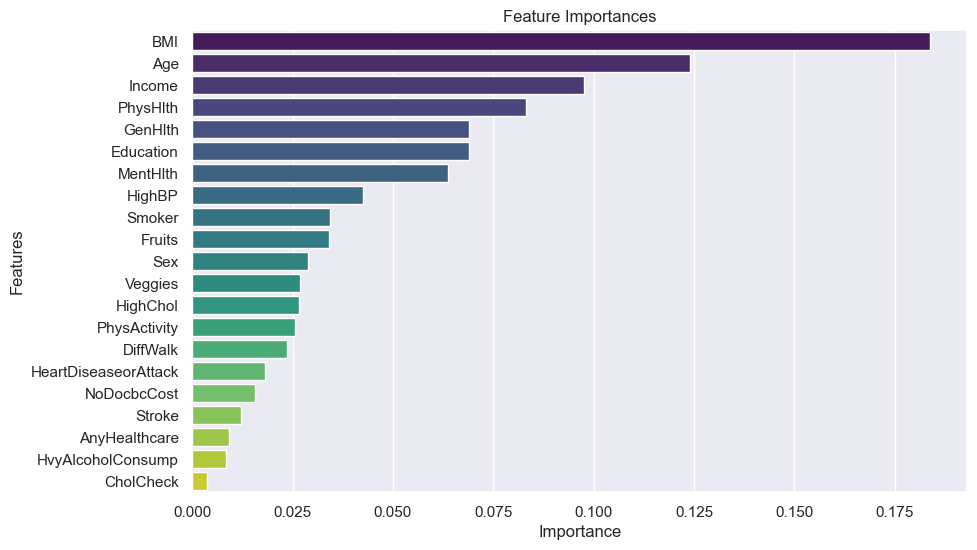

In [6]:
# Feature Importances
feature_importances = pd.Series(rf.feature_importances_, index= X.columns)
sorted_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_importances, y=sorted_importances.index, hue=sorted_importances.index, palette='viridis', legend=False)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

## Application on Boosting: Adaboosting

Next, we're going to apply Adaboosting to this dataset.This algorithm will combine multiple weak decision learners (Decision Trees) to create a strong predictive model. Specifically, it iteratively trains "stumps" (lol), which are shallow trees that have only one split, to create one strong learner. Additionally, because it is boosting, weights will be adjusted each iteration to focus on samples that were misclassified previously. 

We will attempt to distinguis between no diabetes people, pre-diabetics, and diabetics.

In [7]:
X1= df[["BMI", "Age"]].values
y1= df["Diabetes_012"].values

none= df[df['Diabetes_012']==0]
pre= df[df['Diabetes_012']==1]
diab= df[df['Diabetes_012']==2]

We visualize the current data.

253680
253680


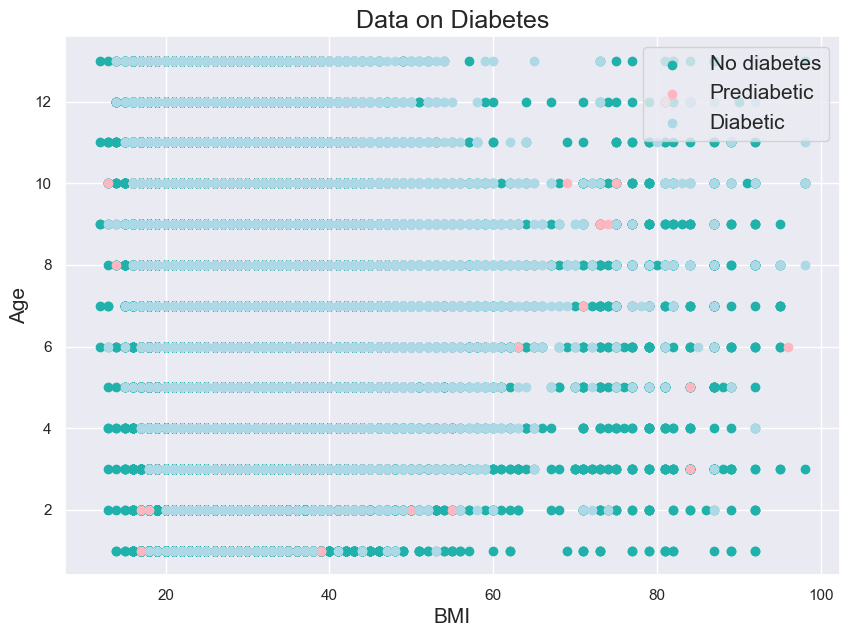

In [11]:
print(len(df["BMI"]))
print(len(df['Age']))


plt.figure(figsize = (10, 7))
plt.scatter(none.BMI, 
            none.Age, 
            color = "lightseagreen",
            label = "No diabetes")
plt.scatter(pre.BMI, 
            pre.Age, 
            color = "lightpink",
            label = "Prediabetic")
plt.scatter(diab.BMI, 
            diab.Age, 
            color = "lightblue",
            label = "Diabetic")
plt.xlabel("BMI", fontsize = 15)
plt.ylabel("Age", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Data on Diabetes", fontsize = 18)
plt.show()



Next, we will implement AdaBoost on the data and analyze how well its done with a classification report.

In [9]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

Xtrain, Xtest, ytrain, ytest = train_test_split(X1, 
                                                    y1,
                                                    test_size = 0.4, 
                                                    random_state = 42)

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1, random_state=42), 
                             n_estimators = 100,
                             algorithm = "SAMME.R",
                             learning_rate = 0.5)
ada_clf.fit(Xtrain, ytrain)
ada_y_pred = ada_clf.predict(Xtest)

print(f"Tree Classification Report")
print(classification_report(ytest, ada_y_pred, zero_division=1), "\n")
accuracy = accuracy_score(ytest, ada_y_pred)
print("Accuracy:", accuracy)


Tree Classification Report
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.91     85569
         1.0       1.00      0.00      0.00      1865
         2.0       0.47      0.05      0.10     14038

    accuracy                           0.84    101472
   macro avg       0.77      0.35      0.34    101472
weighted avg       0.80      0.84      0.78    101472
 

Accuracy: 0.8428729107537054


So accuracy is looking good! Finally, we will plot the model predictions against the actual data to visualize how well the classification is doing.

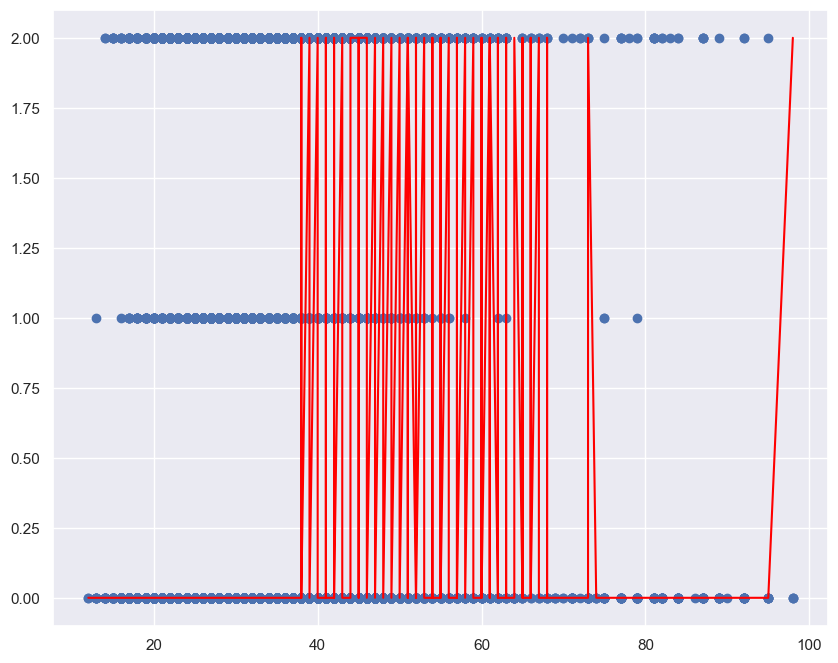

In [10]:

points = [(x[0], y, z) for x, y, z in zip(Xtest, ada_y_pred, ytest)]
points.sort(key = lambda x : x[0])
X_new_test, y_new_pred, y_new_test = np.array([x[0] for x in points]), np.array([x[1] for x in points]), np.array([x[2] for x in points])
X_new_test = X_new_test.reshape(-1, 1)


plt.figure(figsize=(10, 8))
plt.scatter(X_new_test, y_new_test)
plt.plot(X_new_test, y_new_pred, color = "red")
plt.show()

So this plot is a little tough on the eye to look at, but it's also a good example of what overfitting does. Adaboosting is capturing all of the tiny noise and fluctuations. There is also the fact that the data features I've chosen don't really accurately capture the underlying data structures. More relevant features may help with the overfitting. Then again, because our data is so discrete, Adaboost is really struggling, so it's our fault at the same time. 

We could additionally implement gradient boosting on this dataset, but its another boosting techinque, so I chose against it. In essence, gradient boosting is different than Adaboost because it tries to fit the new predictior to the residual errors of the previous predictor. Additional information on this technique can be found in Dr. Davila's lectures. 